In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## Data Loading

In [2]:
# PASTE YOUR DATA PATH HERE
data_path = 'data/data_hw1.csv'

In [3]:
def load_data(path):
    return pd.read_csv(path)

In [4]:
df = load_data(data_path)
df.head()

,age,work_class,education,education_num,marital_status,occupation,ethnicity,gender,capital_gain,capital_loss,hour_per_week,native_country,income_level
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


## Missing Value Imputation

![alt text](https://i.imgur.com/Qfi5g4f.png "Missing data imputation")

# 1. Categorical data

In [5]:
# Missing value is represented as '?'
df['work_class'].value_counts()

Private             5043
Self-emp-not-inc     580
Local-gov            464
?                    437
State-gov            283
Self-emp-inc         269
Federal-gov          202
Never-worked           1
Without-pay            1
Name: work_class, dtype: int64

In [6]:
def plot(df, col_name, kind='pie'):
    # kind = ['pie', 'bar']
    ax = df[col_name].value_counts().plot(kind=kind,
                                          figsize=(12,8),
                                          autopct='%1.4f%%',
                                          title="{} Distribution".format(col_name.title()))
    ax.set_xlabel(col_name)
    ax.set_ylabel("Frequency")
    plt.show()

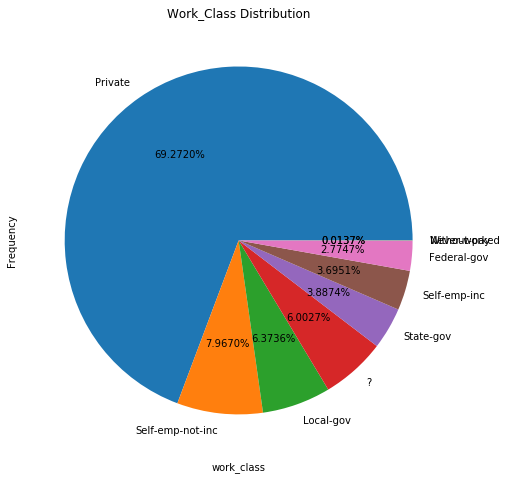

In [7]:
plot(df, 'work_class')

## 1st method: Filling missing value with column's mode

In [8]:
# Find columns mode
def find_col_mode(df, col_name):
    return df.mode()[col_name][0]

In [9]:
mode_workclass = find_col_mode(df, 'work_class')
print('Mode of work_class is: {}'.format(mode_workclass))

Mode of work_class is: Private


In [10]:
# In this case missing value is represented as '?'
df['work_class'] = df['work_class'].apply(lambda val: mode_workclass if val == '?' else val)

In [11]:
def fill_by_mode(df, col_name, missing=None):
    """
        Args:
            df (pandas.DataFrame): Data frame.
            col_name (string): column name.
            missing (string): missing value symbol, N/A if not given.
    """
    mode = find_col_mode(df, col_name)
    if missing:
        df[col_name] = df[col_name].apply(lambda val: mode if val == missing else val)
    else:
        df[col_name] = df[col_name].fillna(mode)

In [12]:
fill_by_mode(df, 'work_class')

In [13]:
# After imputation
df['work_class'].value_counts()

Private             5480
Self-emp-not-inc     580
Local-gov            464
State-gov            283
Self-emp-inc         269
Federal-gov          202
Never-worked           1
Without-pay            1
Name: work_class, dtype: int64

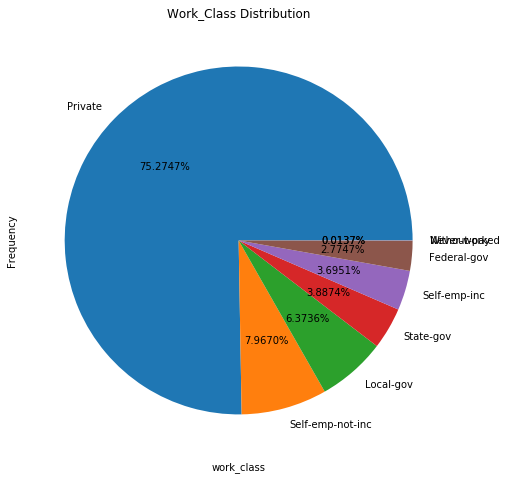

In [14]:
plot(df, 'work_class')

## 2nd method: Filling missing value by making NA as level

In [15]:
df = load_data(data_path)

In [16]:
# Before imputation
df['work_class'].value_counts()

Private             5043
Self-emp-not-inc     580
Local-gov            464
?                    437
State-gov            283
Self-emp-inc         269
Federal-gov          202
Never-worked           1
Without-pay            1
Name: work_class, dtype: int64

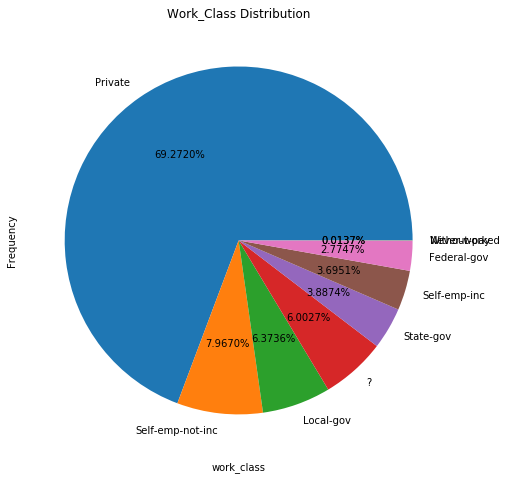

In [17]:
plot(df, 'work_class')

In [18]:
def fill_by_new_level(df, col_name, missing=None, level='NA'):
    if missing:
        df[col_name] = df[col_name].apply(lambda val: level if val == missing else val)
    else:
        df[col_name] = df[col_name].fillna(level)

In [19]:
fill_by_new_level(df, 'work_class', missing='?')

In [20]:
# After imputation
df['work_class'].value_counts()

Private             5043
Self-emp-not-inc     580
Local-gov            464
NA                   437
State-gov            283
Self-emp-inc         269
Federal-gov          202
Never-worked           1
Without-pay            1
Name: work_class, dtype: int64

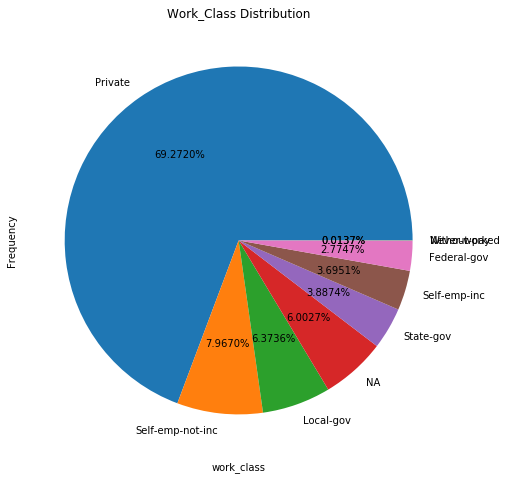

In [21]:
plot(df, 'work_class')

## 3rd method: Drawing from attributes distribution

In [22]:
df = load_data(data_path)

In [23]:
# Before imputation
df['work_class'].value_counts()

Private             5043
Self-emp-not-inc     580
Local-gov            464
?                    437
State-gov            283
Self-emp-inc         269
Federal-gov          202
Never-worked           1
Without-pay            1
Name: work_class, dtype: int64

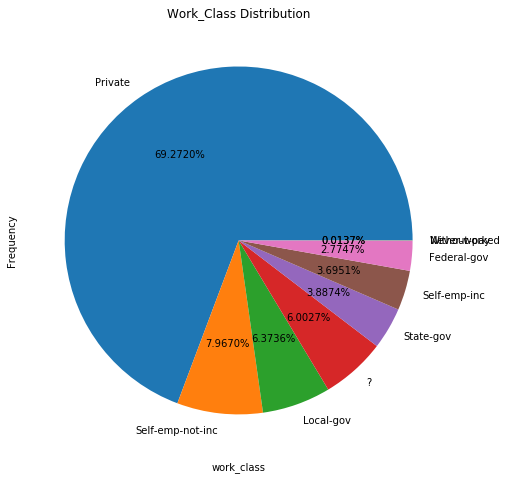

In [24]:
plot(df, 'work_class')

In [25]:
def find_col_dist(df, col_name):
    # Construct value-frequency dict
    freq_dict = df[col_name].value_counts().to_dict()
    values = []
    probabilities = []
    for key, val in freq_dict.items():
        values.append(key)
        probabilities.append(val / len(df))
    return values, probabilities

In [26]:
def fill_by_drawing(df, col_name, missing=None):
    """
        Args:
            df (pandas.DataFrame): Data frame.
            col_name (string): column name.
            missing (string): missing value symbol, N/A if not given.
    """
    if missing:
        df_non_missing = df[df[col_name] != missing]
    else:
        df_non_missing = df[df[col_name].notnull()]
    values, probabilities = find_col_dist(df_non_missing, col_name)
    if missing:
        df[col_name] = df[col_name].apply(lambda val: np.random.choice(values, 1, p=probabilities)[0] 
                                          if val == missing else val)
    else:
        df[col_name] = df[col_name].fillna(np.random.choice(values, 1, p=probabilities)[0])

In [27]:
fill_by_drawing(df, 'work_class', missing='?')

In [28]:
# After imputation
df['work_class'].value_counts()

Private             5361
Self-emp-not-inc     617
Local-gov            493
State-gov            296
Self-emp-inc         291
Federal-gov          219
Never-worked           2
Without-pay            1
Name: work_class, dtype: int64

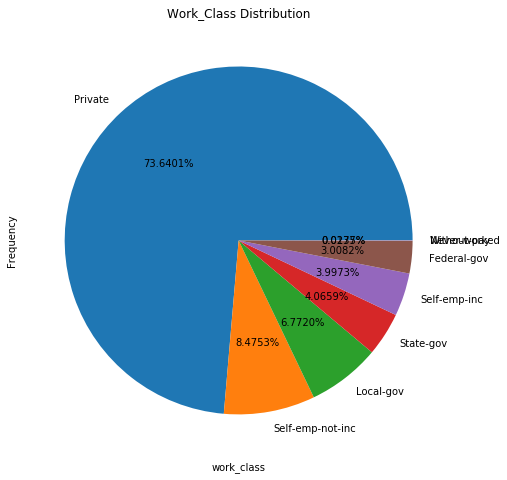

In [29]:
plot(df, 'work_class')

## 4th method: K-Nearest Neighbors imputation

The idea is to find a group of k nearest data examples (rows) in a space (usually Eclidean space) of the row that has missing value, then we fill the missing value by the mode of the attribute in that group. 

In [30]:
df = load_data(data_path)

In [31]:
# Before imputation
df['work_class'].value_counts()

Private             5043
Self-emp-not-inc     580
Local-gov            464
?                    437
State-gov            283
Self-emp-inc         269
Federal-gov          202
Never-worked           1
Without-pay            1
Name: work_class, dtype: int64

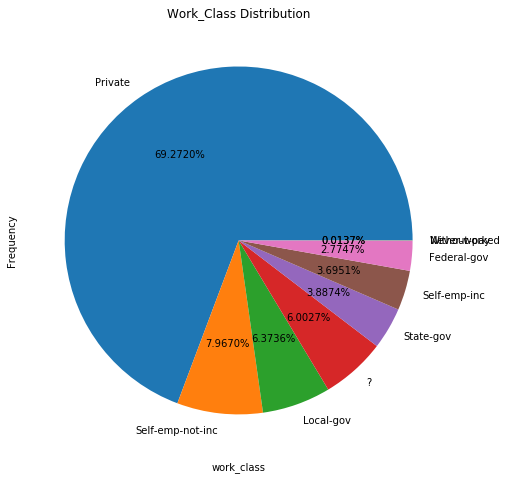

In [32]:
plot(df, 'work_class')

In [33]:
# This is a simple version of KNN imputation
def fill_by_knn(df, col_name, nei_col_names, k=10, missing=None):
    """
        Args:
            df (pandas.DataFrame): Data frame.
            col_name (string): column name.
            nei_col_names (list<string>): list of neighbors column names.
                                          For this example, nei_col_names
                                          only accepts numerical column names.
            k (int): number of nearest neighbors, default 10.
            missing (string): missing value symbol, N/A if not given.
    """
    if missing:
        df_with_missing = df[df[col_name] == missing]
        df_non_missing = df[df[col_name] != missing]
    else:
        df_with_missing = df[df[col_name].isnull()]
        df_non_missing = df[df[col_name].notnull()]
        
    missing_indices = df_with_missing.index
    knn_clf = KNeighborsClassifier(k, weights='distance')
    X_with_missing = df_with_missing[nei_col_names].values
    
    if len(X_with_missing) == 0:
        print('There is no missing value, terminated !')
        return
    
    X_non_missing = df_non_missing[nei_col_names].values
    y_non_missing = df_non_missing[col_name].values
    knn_clf = knn_clf.fit(X_non_missing, y_non_missing)
    
    y_with_missing = knn_clf.predict(X_with_missing)
    index_value_dict = {k: v for k,v in zip(missing_indices, y_with_missing)}
    
    for i, row in df.iterrows():
        if i in index_value_dict:
            df.at[i, col_name] = index_value_dict[i]

In [34]:
fill_by_knn(df, 'work_class', ['age', 'education_num', 'hour_per_week'], k=10, missing='?')

In [35]:
# After imputation
df['work_class'].value_counts()

Private             5441
Self-emp-not-inc     601
Local-gov            475
State-gov            283
Self-emp-inc         273
Federal-gov          204
Never-worked           2
Without-pay            1
Name: work_class, dtype: int64

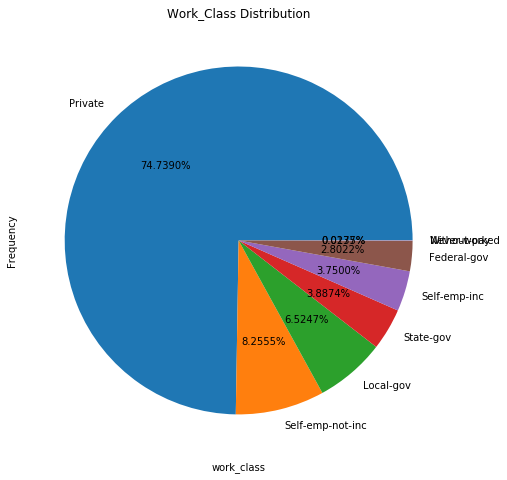

In [36]:
plot(df, 'work_class')

## 5th method: Logistics Regression Imputation

The idea is just like k nearest neighbors method except that instead of using neighbors, we build a logistics regression model to predict the missing value. We're not covering the method here since it's too complex but we will soon dive into logistics regression in some next lectures.

# 2. Numerical data ?

"This is left as an exercise to the reader !"

Hint: for numerical data, we use mean/median instead of mode.